In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
movies=pd.read_csv("movie_metadata.csv")

In [3]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


HANDLING DUPLICATE DATA

In [4]:
movies.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool

In [5]:
#number of duplicated rows
movies.duplicated(keep=False).sum()

90

In [6]:
#i think number of original rows
movies.duplicated().sum()

45

In [7]:
#print duplicate dataset
movies.loc[movies.duplicated().sum()]

color                                                                    Color
director_name                                                        James Wan
num_critic_for_reviews                                                   424.0
duration                                                                 140.0
director_facebook_likes                                                    0.0
actor_3_facebook_likes                                                 14000.0
actor_2_name                                                       Paul Walker
actor_1_facebook_likes                                                 26000.0
gross                                                              350034110.0
genres                                                   Action|Crime|Thriller
actor_1_name                                                     Jason Statham
movie_title                                                         Furious 7 
num_voted_users                                     

In [8]:
#drop duplicates except for first occurences
newMovies=movies.drop_duplicates(keep="first")
newMovies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [9]:
#remove all duplicate rows
newMovies1=movies.drop_duplicates(keep=False) #false--drop all duplicates
newMovies1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [10]:
#drop all duplicates except for last occurrences
newMovies2=movies.drop_duplicates(keep="last")
newMovies2

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [11]:
#changing dataset by setting inplace to true
movies.drop_duplicates(keep="first", inplace=True)
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


HANDLING IRRELEVANT  DATA

In [12]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [13]:
movies.drop(["color","movie_imdb_link"],inplace=True, axis=1)

In [14]:
movies.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


HANDLING STRUCTURAL ERRORS

Data with different data types
Syntax errors (remove white spaces)
Fix typos

Datatype conversion

In [15]:
movies.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [ ]:
#calculate mean value of content_rating
movies.content_rating.mean()

In [ ]:
#replace dtype object to float
movies['content_rating']=movies.content_rating.str.replace("","").astype(float)

In [18]:
movies.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [19]:
movies.content_rating

0       PG-13
1       PG-13
2       PG-13
3       PG-13
4         NaN
        ...  
5038      NaN
5039    TV-14
5040      NaN
5041    PG-13
5042       PG
Name: content_rating, Length: 4998, dtype: object

In [ ]:
movies.content_rating.mean()

HANDLING SYNTAX ERRORS 

Removing white spaces

In [ ]:
#check if the string ends with a white space
movies["genre"]=list(map(lambda x:x.endswith(""),movies["genre_1"]))

HANDLING MISSING  VALUES

Various strategies to remove missing values
1.Removal/deletion of missing values
2.impute missing values the statistical way using mean, mode and median
3.prediction model (regression & calssification models)
4.using sklearn imputation model
5.Using deep learning library - Datawig

Functions used to imputemissing values in a dataset
1.python fillna function
2.interpolation method
3.python replace function

1.REMOVAL / DELETION
Used when missing data is missing completely at random. Non random missing values bias the model output.
pros--creates a robust model
cons--loss of a lot of information, model works poorly if missing values are excessive in comparison to dataset as a whole.

1.listwise deletion.removing rows with cells that have missing data. but this would lead to loss of a lot of data
2.Pairwise deletion. use correlation matrix. if the columns with missing values are strongly correlated, find a way to impute only the missing values. If not, just remove the whole column.

If missing data is less than 10% then we can use list wise deletion. If not we then use pairwise

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4895 non-null   object 
 1   num_critic_for_reviews     4949 non-null   float64
 2   duration                   4983 non-null   float64
 3   director_facebook_likes    4895 non-null   float64
 4   actor_3_facebook_likes     4975 non-null   float64
 5   actor_2_name               4985 non-null   object 
 6   actor_1_facebook_likes     4991 non-null   float64
 7   gross                      4124 non-null   float64
 8   genres                     4998 non-null   object 
 9   actor_1_name               4991 non-null   object 
 10  movie_title                4998 non-null   object 
 11  num_voted_users            4998 non-null   int64  
 12  cast_total_facebook_likes  4998 non-null   int64  
 13  actor_3_name               4975 non-null   object 
 1

In [24]:
movies.describe(include=object) #for categorical

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating
count,4895,4985,4998,4991,4998,4975,4846,4984,4993,4697
unique,2398,3032,914,2097,4917,3521,4760,46,65,18
top,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,Steve Coogan,based on novel,English,USA,R
freq,26,20,235,49,3,8,4,4662,3773,2098


In [25]:
movies.describe(exclude=object) #for continuous

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [26]:
#checking for missing values
movies.isnull().sum()

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

If we are to use listwise deletion, we would lose approximately 40 % of the data. So we shall use pairwise deletion. But the code for both methods will be shown below.

In [27]:
#visualize missing values in a data set
import missingno as msno

<Axes: >

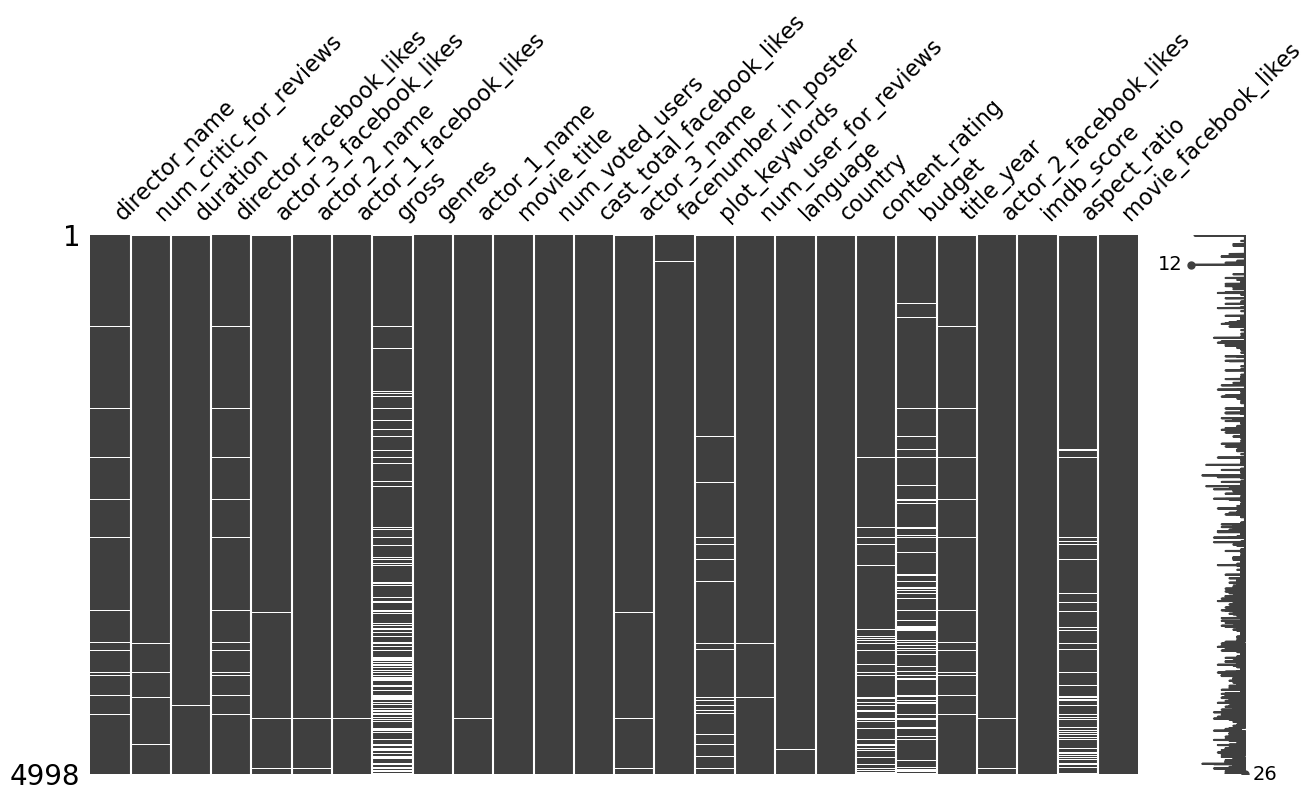

In [28]:
#visualizing missing values as a matrix
msno.matrix(movies,figsize=(15,7))

<Axes: >

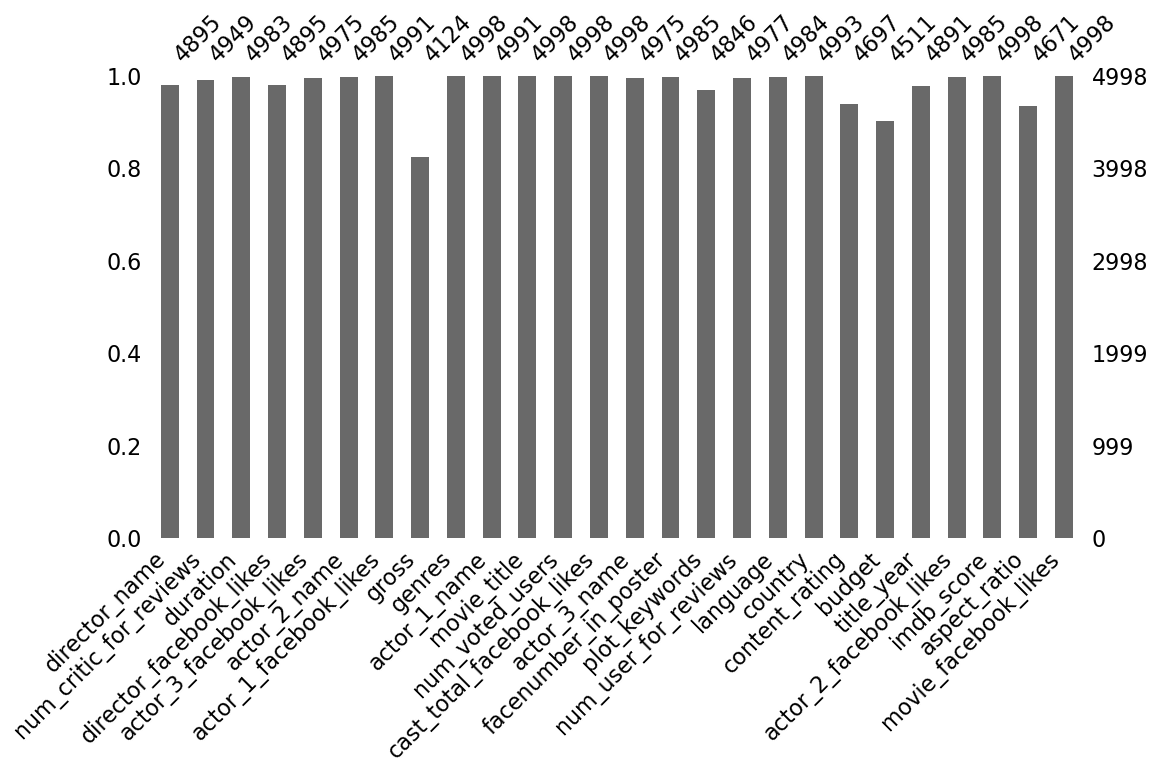

In [29]:
#visualize number of missing values as a bar chart
msno.bar(movies,figsize=(12,6))

In [30]:
#correlation matrix
movies.isnull().corr()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
director_name,1.000000,0.057035,0.043533,1.000000,0.052562,0.047893,-0.005432,0.303976,NaN,-0.005432,...,0.034122,0.018959,0.084507,0.188232,0.403491,0.980729,0.047893,NaN,0.069832,NaN
num_critic_for_reviews,0.057035,1.000000,0.143034,0.057035,0.113250,0.074657,0.050573,0.200106,NaN,0.050573,...,0.652810,0.071571,0.189557,0.222350,0.090563,0.111550,0.074657,NaN,0.261100,NaN
duration,0.043533,0.143034,1.000000,0.043533,0.104357,-0.002802,-0.002055,0.099922,NaN,-0.002055,...,0.166078,0.066299,0.113965,0.170609,0.105313,0.067697,-0.002802,NaN,0.162987,NaN
director_facebook_likes,1.000000,0.057035,0.043533,1.000000,0.052562,0.047893,-0.005432,0.303976,NaN,-0.005432,...,0.034122,0.018959,0.084507,0.188232,0.403491,0.980729,0.047893,NaN,0.069832,NaN
actor_3_facebook_likes,0.052562,0.113250,0.104357,0.052562,1.000000,0.751055,0.550792,0.046524,NaN,0.550792,...,0.178394,0.108266,0.184873,0.156756,0.047440,0.092064,0.751055,NaN,0.089607,NaN
actor_2_name,0.047893,0.074657,-0.002802,0.047893,0.751055,1.000000,0.733358,0.048880,NaN,0.733358,...,0.118142,0.071619,0.122643,0.168704,0.022960,0.073865,1.000000,NaN,0.081804,NaN
actor_1_facebook_likes,-0.005432,0.050573,-0.002055,-0.005432,0.550792,0.733358,1.000000,0.025013,NaN,1.000000,...,0.080278,-0.001985,-0.001185,0.125450,0.005736,-0.005539,0.733358,NaN,0.054999,NaN
gross,0.303976,0.200106,0.099922,0.303976,0.046524,0.048880,0.025013,1.000000,NaN,0.025013,...,0.132958,0.075263,0.068740,0.408192,0.239493,0.310372,0.048880,NaN,0.353210,NaN
genres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor_1_name,-0.005432,0.050573,-0.002055,-0.005432,0.550792,0.733358,1.000000,0.025013,NaN,1.000000,...,0.080278,-0.001985,-0.001185,0.125450,0.005736,-0.005539,0.733358,NaN,0.054999,NaN


<Axes: >

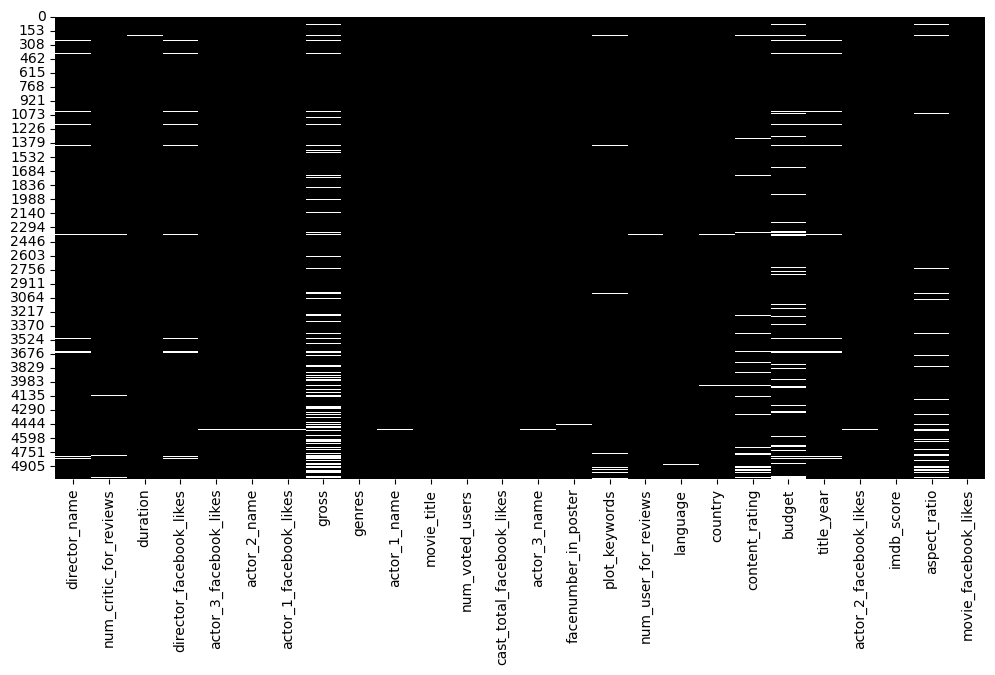

In [31]:
#using  a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(
    data=movies.isnull(),
    cmap=sns.color_palette(['black','yellow','orange','white']),cbar=False
)

It is clear that most missing values are in the columns ; gross, budget, content_rating, and aspect_ratio

In [32]:
#Percentage of missing values in each column
Percentage_Missing_Values=movies.isnull().sum()*100/len(movies)
Percentage_Missing_Values

director_name                 2.060824
num_critic_for_reviews        0.980392
duration                      0.300120
director_facebook_likes       2.060824
actor_3_facebook_likes        0.460184
actor_2_name                  0.260104
actor_1_facebook_likes        0.140056
gross                        17.486995
genres                        0.000000
actor_1_name                  0.140056
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.460184
facenumber_in_poster          0.260104
plot_keywords                 3.041216
num_user_for_reviews          0.420168
language                      0.280112
country                       0.100040
content_rating                6.022409
budget                        9.743898
title_year                    2.140856
actor_2_facebook_likes        0.260104
imdb_score                    0.000000
aspect_ratio                  6.542617
movie_facebook_likes     

METHOD 1
Listwise deletion of null values
use dropna() and drop() functions

In [33]:
#total number of samples where values are NaN
movies[
    (movies['director_name'].isnull()==True) |
    (movies['num_critic_for_reviews'].isnull()==True) |
    (movies['duration'].isnull()==True) |
    (movies['director_facebook_likes'].isnull()==True) |
    (movies['actor_3_facebook_likes'].isnull()==True) |
    (movies['actor_2_name'].isnull()==True) |
    (movies['actor_1_facebook_likes'].isnull()==True) |
    (movies['gross'].isnull()==True) |
    (movies['actor_1_name'].isnull()==True) |
    (movies['actor_3_name'].isnull()==True) |
    (movies['facenumber_in_poster'].isnull()==True) |
    (movies['plot_keywords'].isnull()==True) |
    (movies['num_user_for_reviews'].isnull()==True) |
    (movies['language'].isnull()==True) |
    (movies['country'].isnull()==True) |
    (movies['content_rating'].isnull()==True) |
    (movies['budget'].isnull()==True) |
    (movies['title_year'].isnull()==True) |
    (movies['actor_2_facebook_likes'].isnull()==True) |
    (movies['aspect_ratio'].isnull()==True)

]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
55,Peter Sohn,298.0,93.0,113.0,113.0,Jack McGraw,275.0,123070338.0,Adventure|Animation|Comedy|Family|Fantasy,A.J. Buckley,...,345.0,English,USA,PG,NaN,2015.0,150.0,6.8,2.35,20000
84,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
98,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
99,Peter Jackson,645.0,182.0,0.0,773.0,Adam Brown,5000.0,303001229.0,Adventure|Fantasy,Aidan Turner,...,1367.0,English,USA,PG-13,180000000.0,2012.0,972.0,7.9,2.35,166000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16


In [ ]:
movies.shape

(4998, 26)

In [34]:
#delete all rows where we have missing values
movies_New=movies.dropna()
movies_New

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,Maggie Cheung,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,Fereshteh Sadre Orafaiy,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [35]:
movies_New.shape

(3723, 26)

In [ ]:
4998-3723

1275

OR we can delete rows where 2 or 3 columns have missing data to reduce loss of data

In [36]:
movies_New1=movies.drop(
    movies.index[
        (movies['gross'].isnull()==True)&
        (movies['content_rating'].isnull()==True)
    ]
)

In [37]:
movies_New1

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,Richard Jewell,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [38]:
movies_New1.shape

(4761, 26)

In [39]:
#to delete any row where all columns have null values
movies1=movies.dropna(how="all")
movies1

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


2.Pairwise deletion
Removing an entire column if it has very many null values and its absensure won't affect the model

In [40]:
#Percentage of missing values in each column
Percentage_Missing_Values=movies.isnull().sum()*100/len(movies)
Percentage_Missing_Values

director_name                 2.060824
num_critic_for_reviews        0.980392
duration                      0.300120
director_facebook_likes       2.060824
actor_3_facebook_likes        0.460184
actor_2_name                  0.260104
actor_1_facebook_likes        0.140056
gross                        17.486995
genres                        0.000000
actor_1_name                  0.140056
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.460184
facenumber_in_poster          0.260104
plot_keywords                 3.041216
num_user_for_reviews          0.420168
language                      0.280112
country                       0.100040
content_rating                6.022409
budget                        9.743898
title_year                    2.140856
actor_2_facebook_likes        0.260104
imdb_score                    0.000000
aspect_ratio                  6.542617
movie_facebook_likes     

The column for aspect_ratio will be removed. This is because gross and budget are essential for coming to a conclusion in our hypothesis.

In [41]:
#delete aspect_ratio column
movies_New2=movies.drop("aspect_ratio",axis=1)
movies_New2

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,fraud|postal worker|prison|theft|trial,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,cult|fbi|hideout|prison escape|serial killer,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,NaN,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,NaN,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,660


IMPUTATION USING MEAN, MEDIAN AND MODE

Median and mean is used for quantitative data whereas mode is used for qualitative data.

Generalised imputation. We calculate mean and median for the available data in that whole column/variable and we fill those values in  for the missing data

Similar case imputation. We calculate the mean individually of non missing values of the same value in another variable and fill in that value in the missing values that have the same value in the other variable.

In [42]:
movies.info

<bound method DataFrame.info of           director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
4           Doug Walker                     NaN       NaN   
...                 ...                     ...       ...   
5038        Scott Smith                     1.0      87.0   
5039                NaN                    43.0      43.0   
5040   Benjamin Roberds                    13.0      76.0   
5041        Daniel Hsia                    14.0     100.0   
5042           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2         

In [43]:
movies.isnull().sum()

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

Generalised imputation.

This can be done using the fillna() and replace() functions as shown below

I used fillna() for the continuous/ numerical data and replace() for the categorical data

In [44]:
#first separate the categorical from the numerical/continuous
#or go the long way so that it remains combined
continuous_movies=movies.select_dtypes(exclude='object')
continuous_movies

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,NaN,629,2283,2.0,6.0,NaN,2013.0,470.0,7.7,NaN,84
5039,43.0,43.0,NaN,319.0,841.0,NaN,73839,1753,1.0,359.0,NaN,NaN,593.0,7.5,16.00,32000
5040,13.0,76.0,0.0,0.0,0.0,NaN,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,NaN,16
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,NaN,2012.0,719.0,6.3,2.35,660


In [45]:
continuous_movies.isnull().sum()

num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_1_facebook_likes         7
gross                        874
num_voted_users                0
cast_total_facebook_likes      0
facenumber_in_poster          13
num_user_for_reviews          21
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [46]:
#impute numerical/continuous data with median
continuous_movies['num_critic_for_reviews'].fillna(continuous_movies['num_critic_for_reviews'].median(),inplace=True)
continuous_movies['duration'].fillna(continuous_movies['duration'].median(),inplace=True)
continuous_movies['director_facebook_likes'].fillna(continuous_movies['director_facebook_likes'].median(),inplace=True)
continuous_movies['actor_3_facebook_likes'].fillna(continuous_movies['actor_3_facebook_likes'].median(),inplace=True)
continuous_movies['actor_1_facebook_likes'].fillna(continuous_movies['actor_1_facebook_likes'].median(),inplace=True)
continuous_movies['gross'].fillna(continuous_movies['gross'].median(),inplace=True)
continuous_movies['facenumber_in_poster'].fillna(continuous_movies['facenumber_in_poster'].median(),inplace=True)
continuous_movies['num_user_for_reviews'].fillna(continuous_movies['num_user_for_reviews'].median(),inplace=True)
continuous_movies['budget'].fillna(continuous_movies['budget'].median(),inplace=True)
continuous_movies['title_year'].fillna(continuous_movies['title_year'].median(),inplace=True)
continuous_movies['actor_2_facebook_likes'].fillna(continuous_movies['actor_2_facebook_likes'].median(),inplace=True)
continuous_movies['aspect_ratio'].fillna(continuous_movies['aspect_ratio'].median(),inplace=True)

In [47]:
continuous_movies.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [48]:
categorical_movies=movies.select_dtypes(include='object')
categorical_movies

,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating
0,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,English,USA,PG-13
1,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13
2,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13
3,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13
4,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe,fraud|postal worker|prison|theft|trial,English,Canada,NaN
5039,NaN,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,Sam Underwood,cult|fbi|hideout|prison escape|serial killer,English,USA,TV-14
5040,Benjamin Roberds,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler,NaN,English,USA,NaN
5041,Daniel Hsia,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,Eliza Coupe,NaN,English,USA,PG-13


In [49]:
categorical_movies.isnull().sum()

director_name     103
actor_2_name       13
genres              0
actor_1_name        7
movie_title         0
actor_3_name       23
plot_keywords     152
language           14
country             5
content_rating    301
dtype: int64

In [51]:
#impute categorical data with mode
categorical_movies['director_name'].replace(np.NaN,categorical_movies['director_name'].mode()[0],inplace=True)
categorical_movies['actor_2_name'].replace(np.NaN,categorical_movies['actor_2_name'].mode()[0],inplace=True)
categorical_movies['genres'].replace(np.NaN,categorical_movies['genres'].mode()[0],inplace=True)
categorical_movies['actor_1_name'].replace(np.NaN,categorical_movies['actor_1_name'].mode()[0],inplace=True)
categorical_movies['movie_title'].replace(np.NaN,categorical_movies['movie_title'].mode()[0],inplace=True)
categorical_movies['actor_3_name'].replace(np.NaN,categorical_movies['actor_3_name'].mode()[0],inplace=True)
categorical_movies['plot_keywords'].replace(np.NaN,categorical_movies['plot_keywords'].mode()[0],inplace=True)
categorical_movies['language'].replace(np.NaN,categorical_movies['language'].mode()[0],inplace=True)
categorical_movies['country'].replace(np.NaN,categorical_movies['country'].mode()[0],inplace=True)
categorical_movies['content_rating'].replace(np.NaN,categorical_movies['content_rating'].mode()[0],inplace=True)


In [52]:
categorical_movies.isnull().sum()

director_name     0
actor_2_name      0
genres            0
actor_1_name      0
movie_title       0
actor_3_name      0
plot_keywords     0
language          0
country           0
content_rating    0
dtype: int64

Similar case imputation

In [53]:
movies.info

<bound method DataFrame.info of           director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
4           Doug Walker                     NaN       NaN   
...                 ...                     ...       ...   
5038        Scott Smith                     1.0      87.0   
5039                NaN                    43.0      43.0   
5040   Benjamin Roberds                    13.0      76.0   
5041        Daniel Hsia                    14.0     100.0   
5042           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2         

For this, we can use the variables; director_name, genres or language

In [54]:
movies

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [55]:
movies.dtypes

director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [56]:
movies['language']

0       English
1       English
2       English
3       English
4           NaN
         ...   
5038    English
5039    English
5040    English
5041    English
5042    English
Name: language, Length: 4998, dtype: object

In [57]:
movies['budget'].fillna(movies.groupby(['language'])['budget'].transform('mean'),inplace=True)

In [58]:
movies['budget'].fillna(movies.groupby(['director_name'])['budget'].transform('mean'),inplace=True)

In [61]:
movies['budget'].fillna(movies.groupby(['genres'])['budget'].transform('mean'),inplace=True)

In [62]:
movies.isnull().sum()

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                         0
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

You can also do the imputation using two columns

In [63]:
movies

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,2.450000e+08,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,2.500000e+08,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,9.123437e+06,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,3.457725e+07,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,3.457725e+07,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1.400000e+03,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,3.457725e+07,2012.0,719.0,6.3,2.35,660


In [71]:
movies['gross'].fillna(movies.groupby(['genres','language'])['gross'].transform('mean'),inplace=True)  #or median

find the function to use for mode when imputing.    
.transform is for mean and median

In [72]:
movies.isnull().sum()

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        209
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                         0
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

IMPUTING MISSING VALUES WITH PREDICTION MODEL

Regression model for continuous data . 
Classification model for categorical data. 
The dataset should be divided ino two. The training dataset and the testing dataset
The training dataset should contain missing values. The testing dataset should not

When given a dataset, first modify it. Put the column of missing values as the output(target) and the original output as now an input variable(predictor). 
Then, separate the rows with missing values in the target column from those with values. And there you have your training dataset and your testing dataset

For the training dataset, the input variables(predictors) will become the  X_train and the output(target) will become the y_train.

For the testing dataset, the input variables(predictors) will become the  X_test and the output(target) will become the y_prediction

After getting the prediction, combine the datasets  and get the actual training dataset after imputation.

This actual training dataset will be the one used to train our machine learning model

In [3]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
movies.shape

(5043, 28)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [9]:
#create a smaller dataframe using only a few necessary columns including that whose missing values are to be imputed
meloMovies=movies[['gross','imdb_score','budget','movie_facebook_likes','language']]

In [10]:
meloMovies.head()

,gross,imdb_score,budget,movie_facebook_likes,language
0,760505847.0,7.9,237000000.0,33000,English
1,309404152.0,7.1,300000000.0,0,English
2,200074175.0,6.8,245000000.0,85000,English
3,448130642.0,8.5,250000000.0,164000,English
4,NaN,7.1,NaN,0,NaN
